In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler
from env import *
from wrangle import *

# Clustering Anomaly Detection on Grocery database

In [2]:
df = wrangle_grocery()

In [3]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
customer_id,,,,,,,,
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
# Make the scaler
scaler = MinMaxScaler()

In [5]:
data_to_scale = df[['Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen']]

In [6]:
# Fit the scaler
scaler.fit(data_to_scale)

MinMaxScaler()

In [7]:
# Transform the df
data_to_scale = scaler.transform(data_to_scale)

In [8]:
data_to_scale[-5:]

array([[0.26482862, 0.16333755, 0.17271522, 0.21546907, 0.00438468,
        0.04591156],
       [0.34976103, 0.01873562, 0.00820246, 0.0737131 , 0.00220459,
        0.04887359],
       [0.1295431 , 0.21013575, 0.32594285, 0.00677142, 0.36346267,
        0.03888194],
       [0.091727  , 0.02622442, 0.02402535, 0.01664914, 0.00404174,
        0.04426366],
       [0.02482434, 0.02237109, 0.02702178, 0.00065742, 0.01161082,
        0.00102211]])

In [9]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
customer_id,,,,,,,,
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [10]:
# Now, let's add the scaled value columns back onto the dataframe
columns = ['Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen']
scaled_columns = ["Scaled_" + column for column in columns]

In [11]:
scaled_columns

['Scaled_Fresh',
 'Scaled_Milk',
 'Scaled_Grocery',
 'Scaled_Frozen',
 'Scaled_Detergents_Paper',
 'Scaled_Delicassen']

In [12]:
# Save a copy of the original dataframe
original_df = df.copy()

In [13]:
# Create a dataframe containing the scaled values
scaled_df = pd.DataFrame(data=data_to_scale, columns=scaled_columns)

In [14]:
scaled_df.head()

,Scaled_Fresh,Scaled_Milk,Scaled_Grocery,Scaled_Frozen,Scaled_Detergents_Paper,Scaled_Delicassen
0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847
1,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984
2,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559
3,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234
4,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093


In [15]:
# Make the object
dbsc = DBSCAN(eps = .1, min_samples = 20)

In [16]:
# Fit the object
dbsc.fit(scaled_df)

DBSCAN(eps=0.1, min_samples=20)

In [17]:
scaled_df['labels'] = dbsc.labels_
scaled_df.labels.value_counts()

 0    369
-1     71
Name: labels, dtype: int64

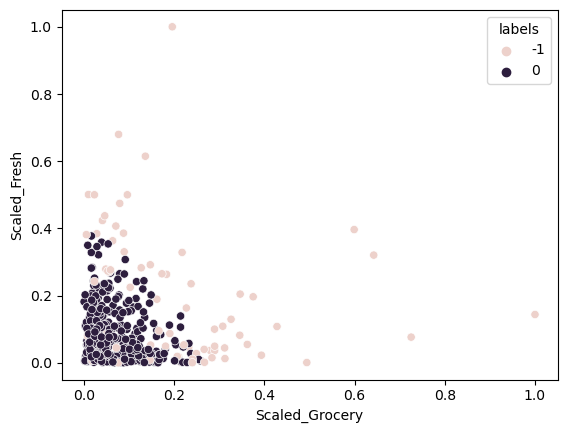

In [18]:
sns.scatterplot(x=scaled_df.Scaled_Grocery, y=scaled_df.Scaled_Fresh, hue=scaled_df.labels)
plt.show()

In [19]:
# Merge the scaled and non-scaled values into one dataframe
df = df.merge(scaled_df, on=df.index)
df = df.drop(columns=['key_0'])

In [20]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Scaled_Fresh,Scaled_Milk,Scaled_Grocery,Scaled_Frozen,Scaled_Detergents_Paper,Scaled_Delicassen,labels
0,2,3,12669,9656,7561,214,2674,1338,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847,0
1,2,3,7057,9810,9568,1762,3293,1776,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984,0
2,2,3,6353,8808,7684,2405,3516,7844,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559,-1
3,1,3,13265,1196,4221,6404,507,1788,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234,0
4,2,3,22615,5410,7198,3915,1777,5185,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093,0


In [21]:
df['labels'] = dbsc.labels_
df.labels.value_counts()

 0    369
-1     71
Name: labels, dtype: int64

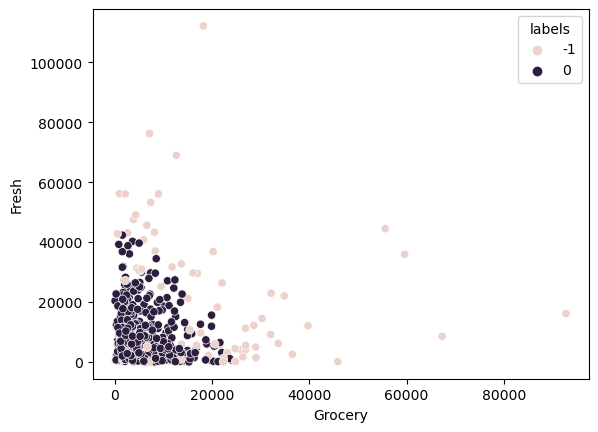

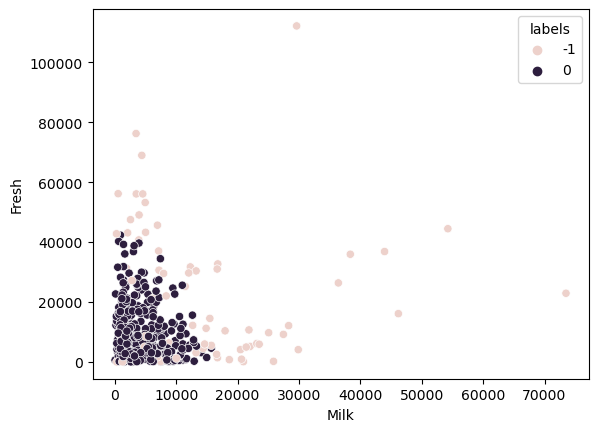

In [22]:
sns.scatterplot(x=df.Grocery, y=df.Fresh, hue=df.labels)
plt.show()

sns.scatterplot(x=df.Milk, y=df.Fresh, hue=df.labels)
plt.show()

In [23]:
df[df['labels'] == -1].describe().T - df[df['labels'] == 0].describe().T

,count,mean,std,min,25%,50%,75%,max
Channel,-298.0,0.253368,0.051801,0.000000,0.000000,1.000000,0.000000,0.000000
Region,-298.0,-0.059888,0.040116,0.000000,0.000000,0.000000,0.000000,0.000000
Fresh,-298.0,12058.322035,13437.071859,0.000000,1913.000000,4341.000000,19152.500000,69839.000000
Milk,-298.0,10749.797053,10357.166425,231.000000,3336.000000,9124.000000,14655.000000,57769.000000
Grocery,-298.0,13523.501584,11605.058366,468.000000,4805.000000,13145.000000,18108.500000,68782.000000
Frozen,-298.0,4224.208939,7241.988390,11.000000,408.000000,1702.000000,4530.000000,45521.000000
Detergents_Paper,-298.0,5960.833352,6659.807066,12.000000,529.500000,3536.000000,9321.500000,30758.000000
Delicassen,-298.0,2421.825528,5217.494387,0.000000,484.000000,1183.000000,2315.000000,41571.000000
Scaled_Fresh,-298.0,0.107522,0.119816,0.000000,0.017058,0.038708,0.170779,0.622740
Scaled_Milk,-298.0,0.146369,0.141023,0.003145,0.045423,0.124232,0.199543,0.786583


# Clustering Anomaly Detection on curriculum access logs

In [24]:
log_df = wrangle_logs()

In [25]:
log_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 900223 entries, 2018-01-26 to 2021-04-21
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time        900223 non-null  object        
 1   path        900222 non-null  object        
 2   user_id     900223 non-null  int64         
 3   cohort_id   847330 non-null  float64       
 4   ip          900223 non-null  object        
 5   id          847330 non-null  float64       
 6   name        847330 non-null  object        
 7   slack       847330 non-null  object        
 8   start_date  847330 non-null  object        
 9   end_date    847330 non-null  object        
 10  created_at  847330 non-null  object        
 11  updated_at  847330 non-null  object        
 12  deleted_at  0 non-null       object        
 13  program_id  847330 non-null  float64       
 14  datetime    900223 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), i

In [43]:
log_df.user_id.value_counts().head(1)

11    17913
Name: user_id, dtype: int64

In [45]:
#Resample the data by day and count the number of hits each day
daily_hits = log_df[log_df.user_id == 11].
daily_hits.head()

,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id,datetime
date,,,,,,,,,,,,,,,
2018-01-26,10:14:47,/,11,1.0,97.105.19.61,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0,2018-01-26 10:14:47
2018-01-26,10:14:51,javascript-i,11,1.0,97.105.19.61,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0,2018-01-26 10:14:51
2018-01-26,10:15:02,javascript-i/functions,11,1.0,97.105.19.61,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0,2018-01-26 10:15:02
2018-01-26,11:46:29,appendix/further-reading/javascript/hoisting.html,11,1.0,97.105.19.61,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0,2018-01-26 11:46:29
2018-01-26,11:46:39,appendix,11,1.0,97.105.19.61,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0,2018-01-26 11:46:39


In [30]:
log_df.isna().sum()

time               0
path               1
user_id            0
cohort_id      52893
ip                 0
id             52893
name           52893
slack          52893
start_date     52893
end_date       52893
created_at     52893
updated_at     52893
deleted_at    900223
program_id     52893
datetime           0
dtype: int64

In [31]:
log_df[log_df.path.isna() == True]

,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id,datetime
date,,,,,,,,,,,,,,,
2020-04-08,09:25:18,None,586,55.0,72.177.240.51,55.0,Curie,#curie,2020-02-03,2020-07-07,2020-02-03 19:31:51,2020-02-03 19:31:51,None,3.0,2020-04-08 09:25:18


# Clustering Anomaly Detection on wine quality

In [27]:
wine_df = pour_wine()

In [28]:
# Save a copy of the original dataframe
original_wine_df = wine_df.copy()

In [29]:
wine_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')